Given a classified data set from a company! 
They've hidden the feature column names but have given the data and the target classes.
I try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_set = pd.read_csv('/Users/Cho/Desktop/Python/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/Classified Data', index_col=0)

In [3]:
data_set.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
data_set['TARGET CLASS'].nunique()

2

# Standardize the Variables

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(data_set.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(data_set.drop('TARGET CLASS', axis=1))

In [8]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [9]:
data_set_feat = pd.DataFrame(scaled_features, columns=data_set.columns[:-1])

# Split the Data into Training and Testing

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data_set_feat
y = data_set['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# KNN model prediction using default parameters

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
predictions = knn.predict(X_test)

# Model Evaluations

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## Get best parameters with GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
#parameter grid
parameters={"n_neighbors":np.arange(1, 40), "weights":["uniform","distance"], 'metric': ['euclidean', 'minkowski', 'manhattan'] }

In [22]:
grid = GridSearchCV(KNeighborsClassifier(), parameters, verbose=3, cv=10, n_jobs=-1)

In [23]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 234 candidates, totalling 2340 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 382 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 1342 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 2340 out of 2340 | elapsed:   18.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'minkowski', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [24]:
# View The Best Parameters
print('Best n_neighbors:', grid.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', grid.best_estimator_.get_params()['weights'])
print('Best metric:', grid.best_estimator_.get_params()['metric'])
print("accuracy :",grid.best_score_)

Best n_neighbors: 10
Best weights: uniform
Best metric: euclidean
accuracy : 0.9457142857142857


**Redo the model with the new parameters**

In [25]:
knn_grid = KNeighborsClassifier(n_neighbors=10, weights= 'uniform', metric='euclidean')

In [26]:
knn_grid.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [27]:
grid_predictions = knn_grid.predict(X_test)

# Model Evaluation With Best Parameters

In [28]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[156   3]
 [ 11 130]]


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       159
           1       0.98      0.92      0.95       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# Choosing K Value manually

In [25]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

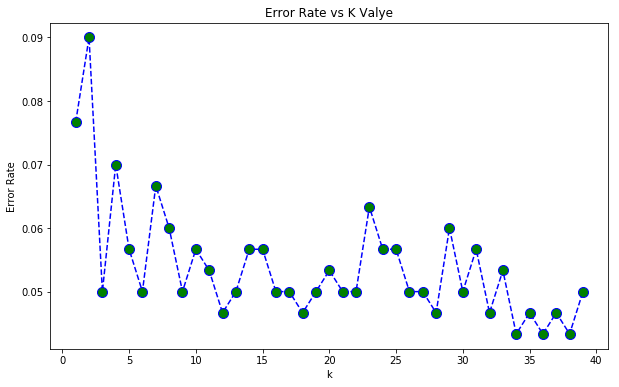

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate vs K Valye')
plt.xlabel('k')
plt.ylabel('Error Rate')

# K = 17

In [28]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [29]:
print(confusion_matrix(y_test,predictions))

[[153   6]
 [  9 132]]


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# K = 23

In [32]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [34]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[150   9]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       159
           1       0.94      0.93      0.93       141

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

